In [21]:
import numpy as np

class Model:

    processNum: int
    resourceDevice = (8 * 128^2 * 10 + 8^2)

    width: int
    height: int
    neighborNum: int
    obstacleNum: float

    def __init__(self, processNum, width, height, neighborNum, obstacleNum) -> None:
        self.processNum = processNum
        self.width = width
        self.height = height
        self.neighborNum = neighborNum
        self.obstacleNum = obstacleNum
    
    def sortingNetworkSize(self):
        return (2.367124*self.width + 0.950211*self.height - 0.055066*self.obstacleNum)/self.processNum\
            + 0.213089*self.height + 0.003213*self.width*self.height
            #後ろの項は影響小さめなので無視して良さそう
    
    def iterNum(self):
        return (self.height - 1) * 1.005871 + (204.236708 * self.obstacleNum/(self.width*self.height))/self.processNum 
    
    def instCore(self):
        constant = 1
        return np.log2(self.sortingNetworkSize()) + self.neighborNum * constant
    
    def resourceCore(self):
        constant = 7*10/(128*128)
        return pow(self.sortingNetworkSize(), 2) * constant
        #128^2*C1 : C2 = 10:1

    def resourceNetwork(self):
        constant = 7
        return self.processNum*self.processNum * constant

    def resourceAll(self):
        return self.resourceCore() * self.processNum + self.resourceNetwork()
        # ((2.367124*width + 0.950211*height - 0.055066*obstacleNum)/processNum)^2 * 10/128*128 * processNum = C/processNum
        # processNum^2 * constant

        # R_device = (C1/processNum + processNum^2 * C2) * C3
        # processNum*R_device/C3 = C1 + processNum^3 * C2
        # processNum * R_device/C3 - processNum^3 * C2 - C1= 0 
        # processNum * (R_device/C3 - processNum^3 * C2)


    def fmax(self):
        constant = 1
        return 1
        return constant / (self.resourceAll() / self.resourceDevice)

        # =C4*Rdevice/(C1/processNum + processNum^2 * C2) * C3

    # constraint
    def isValid(self)->bool:
        return self.resourceDevice >= self.resourceAll()

    # object
    def calcTime(self):
        return self.instCore() * self.iterNum() / self.fmax()
        # log2(2.367124*self.width + 0.950211*self.height - 0.055066*obstacleNum) + neightNum*C - log2(self.processNum) = C5 - log2(processNum)
        # (self.height - 1) * 1.04 + (0.059319 * obstacleNum - 0.331970*self.width)/self.processNum = C6 + C7/processNum

        # = (C5 - log2(processNum))*(C6 + C7/processNum)/(C4*Rdevice/(C1/processNum + processNum^2 * C2) * C3)



1054


,x,SNetSize,resCore,resNet,resAll,iterNum,instCore,fmax,valid,calcTime
0,1,330.106400,465.571074,7,472.571074,120.004900,16.366787,1,True,1964.094670
1,2,191.772650,157.127225,28,342.254449,109.793064,15.583253,1,True,1710.933119
2,3,145.661400,90.649844,63,334.949532,106.389119,15.186475,1,True,1615.675679
3,4,122.605775,64.224385,112,368.897540,104.687147,14.937883,1,True,1563.804362
4,5,108.772400,50.549344,175,427.746719,103.665963,14.765169,1,True,1530.645437
5,6,99.550150,42.341081,252,506.046484,102.985174,14.637352,1,True,1507.430202
6,7,92.962829,36.922981,343,601.460869,102.498896,14.538582,1,True,1490.188614
7,8,88.022338,33.102736,448,712.821891,102.134188,14.459798,1,True,1476.839703
8,9,84.179733,30.275630,567,839.480672,101.850526,14.395401,1,True,1466.179164
9,10,81.105650,28.104788,700,981.047884,101.623596,14.341731,1,True,1457.458229


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
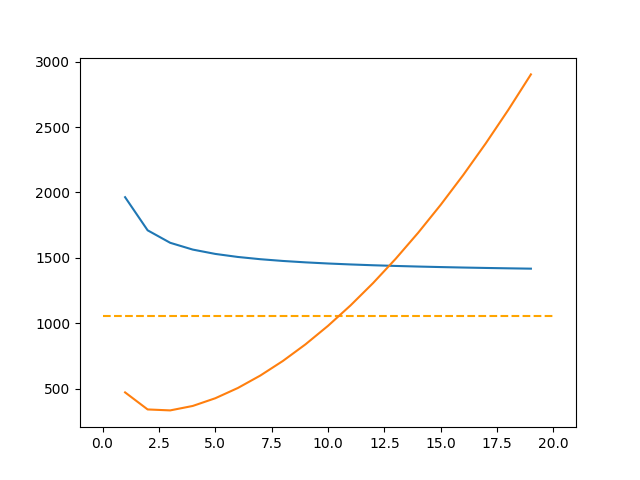

In [22]:
%matplotlib widget

from matplotlib import pyplot as plt
import pandas as pd

width = 100
height = 100
neighborNum = 8
obstacleNum = 1000

xs = list(range(1, 20))
rows = []
for x in xs:
    m = Model(processNum=x, width=width, height=height,
              neighborNum=neighborNum, obstacleNum=obstacleNum)
    rows.append([x, m.sortingNetworkSize(), m.resourceCore(), m.resourceNetwork(), m.resourceAll(), m.iterNum(), m.instCore(), m.fmax(), m.isValid(), m.calcTime()])

df = pd.DataFrame(rows, columns=["x","SNetSize","resCore","resNet","resAll","iterNum","instCore","fmax","valid","calcTime"])

print(8 * 128^2 * 10 + 8^2)
display(df)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df['x'], df['calcTime'])
ax.plot(df['x'], df['resAll'])
ax.hlines((8 * 128^2 * 10 + 8^2),0,20,color="orange", linestyles='dashed')



